# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [4]:
cities

['utena',
 'yellowknife',
 'thompson',
 'hobart',
 'geraldton',
 'rikitea',
 'chuy',
 'ribeira grande',
 'amderma',
 'blonduos',
 'bengkulu',
 'ushuaia',
 'bonthe',
 'hilo',
 'butaritari',
 'hithadhoo',
 'padang',
 'uwayl',
 'raul soares',
 'bathsheba',
 'general pico',
 'tokur',
 'bredasdorp',
 'cidreira',
 'albany',
 'saint-pierre',
 'taolanaro',
 'puyang',
 'punta arenas',
 'cape town',
 'vershino-shakhtaminskiy',
 'ahipara',
 'norman wells',
 'kaitangata',
 'qaanaaq',
 'belushya guba',
 'bluff',
 'vaini',
 'victoria',
 'moron',
 'chom bung',
 'ada',
 'ilulissat',
 'lasa',
 'illoqqortoormiut',
 'tvoroyri',
 'mataura',
 'puerto ayora',
 'itarema',
 'ingham',
 'east london',
 'kenora',
 'busselton',
 'kavieng',
 'barra',
 'jamestown',
 'dikson',
 'saskylakh',
 'port blair',
 'avarua',
 'barentsburg',
 'kysyl-syr',
 'tuatapere',
 'yulara',
 'silopi',
 'chapais',
 'chokurdakh',
 'luanda',
 'micheweni',
 'torbay',
 'cabo san lucas',
 'luderitz',
 'balancan',
 'chuguyevka',
 'irtyshskiy',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" #add imperial metric
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    #break <-- used to try one call before applying for loop. 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utena
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | blonduos
City not found. Skipping...
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bonthe
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | uwayl
City not found. Skipping...
Processing Record 19 of Set 1 | raul soares
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | general pico
Proces

Processing Record 36 of Set 4 | bazaliya
Processing Record 37 of Set 4 | aklavik
Processing Record 38 of Set 4 | namatanai
Processing Record 39 of Set 4 | bac lieu
Processing Record 40 of Set 4 | bonoua
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | terney
Processing Record 44 of Set 4 | florian
Processing Record 45 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | razvilnoye
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | richards bay
Processing Record 0 of Set 5 | kaeo
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | strezhevoy
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | dehloran
Processing Record 8 of Set 5 | ixtapa
Pr

Processing Record 29 of Set 8 | gamba
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | juba
Processing Record 34 of Set 8 | lundamo
Processing Record 35 of Set 8 | ust-uda
Processing Record 36 of Set 8 | sladkovo
Processing Record 37 of Set 8 | esmeraldas
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | la rioja
Processing Record 40 of Set 8 | puerto plata
Processing Record 41 of Set 8 | florianopolis
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | ha giang
Processing Record 44 of Set 8 | metro
Processing Record 45 of Set 8 | chanika
Processing Record 46 of Set 8 | hovd
Processing Record 47 of Set 8 | kattivakkam
Processing Record 48 of Set 8 | quang ngai
Processing Record 49 of Set 8 | great yarmouth
Processing Record 0 of Set 9 | rabaul
Processing Record 1 of Set 9 | ucluelet
Processing Record 2 of Set 9 | paraiso


Processing Record 16 of Set 12 | santander
Processing Record 17 of Set 12 | abonnema
Processing Record 18 of Set 12 | saint-michel-des-saints
Processing Record 19 of Set 12 | bloomfield
Processing Record 20 of Set 12 | kagoro
Processing Record 21 of Set 12 | whitehorse
Processing Record 22 of Set 12 | marsh harbour
Processing Record 23 of Set 12 | glyadyanskoye
Processing Record 24 of Set 12 | potosi
Processing Record 25 of Set 12 | myitkyina
Processing Record 26 of Set 12 | loandjili
Processing Record 27 of Set 12 | dordrecht
Processing Record 28 of Set 12 | dhidhdhoo
Processing Record 29 of Set 12 | baykit
Processing Record 30 of Set 12 | biskamzha
Processing Record 31 of Set 12 | kem
Processing Record 32 of Set 12 | calama
Processing Record 33 of Set 12 | alyangula
Processing Record 34 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 35 of Set 12 | trat
Processing Record 36 of Set 12 | warsaw
Processing Record 37 of Set 12 | pinsk
Processing Record 38 of Set 

In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [90]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utena,55.5000,25.6000,-3.33,91,13,1.90,LT,1674441600
1,yellowknife,62.4560,-114.3525,-29.05,97,58,2.32,CA,1674441498
2,thompson,55.7435,-97.8558,-10.91,92,100,6.17,CA,1674441539
3,hobart,-42.8794,147.3294,26.70,52,20,4.12,AU,1674441607
4,geraldton,-28.7667,114.6000,26.23,61,5,6.69,AU,1674441859


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utena,55.5000,25.6000,-3.33,91,13,1.90,LT,1674441600
1,yellowknife,62.4560,-114.3525,-29.05,97,58,2.32,CA,1674441498
2,thompson,55.7435,-97.8558,-10.91,92,100,6.17,CA,1674441539
3,hobart,-42.8794,147.3294,26.70,52,20,4.12,AU,1674441607
4,geraldton,-28.7667,114.6000,26.23,61,5,6.69,AU,1674441859


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

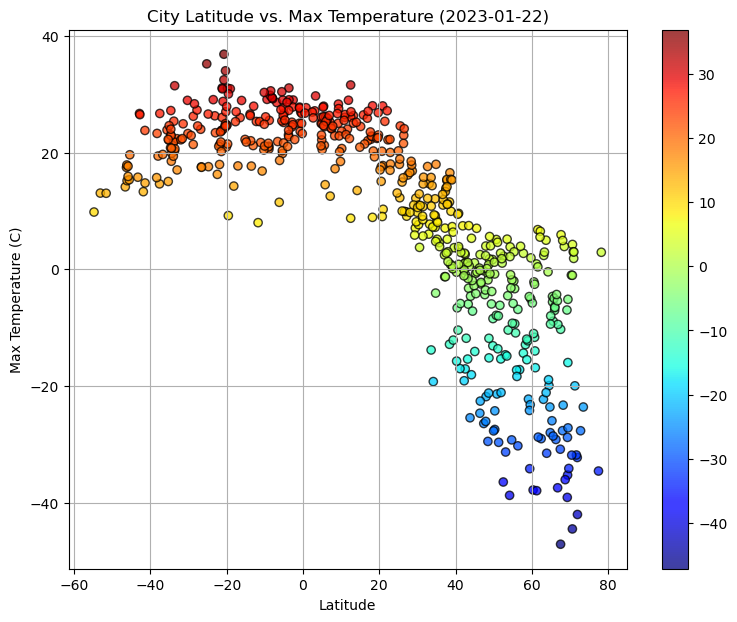

In [23]:
plt.figure(figsize=(9,7))

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=.75, c=city_data_df["Max Temp"], cmap="jet")
# I added the "c" parameter to vary the color based on temperature. 
# The "cmap" parameter chooses color gradients. The "jet" cmap is a popular one for temperature. 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-01-22)")
plt.grid(axis="both")
plt.colorbar() #add color gradient bar

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

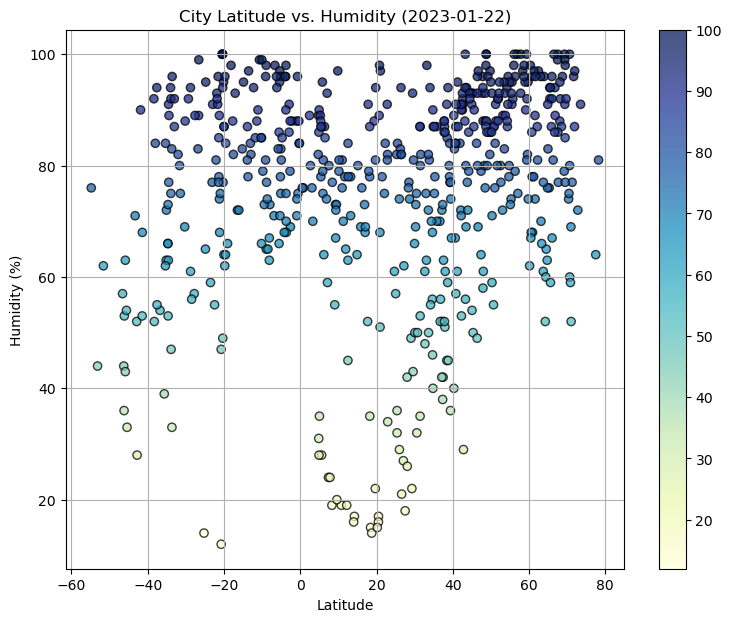

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=.75, c=city_data_df["Humidity"], cmap="YlGnBu")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-01-22)")
plt.grid(axis="both")
plt.colorbar()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

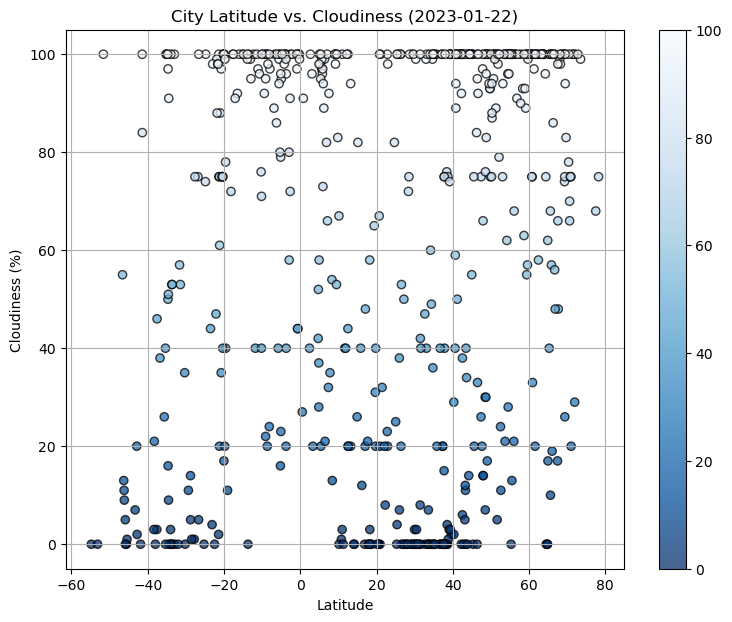

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
cmap = plt.get_cmap("Blues").reversed() 
# Blues is an existing color map that goes from white to blue. 
# It makes sense to reverse this, as blue = clear skies, and white = clouds. 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=.75, c=city_data_df["Cloudiness"], cmap=cmap)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-01-22)")
plt.grid(axis="both")
plt.colorbar()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

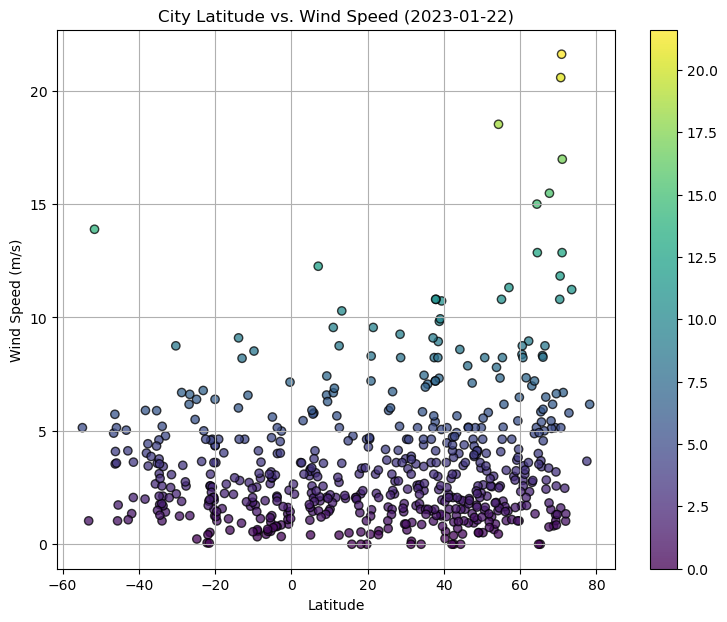

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=.75, c=city_data_df["Wind Speed"], cmap="viridis")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-01-22)")
plt.grid(axis="both")
plt.colorbar()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x, y, hem, colormap):
    # plot scatter plot first.
    plt.figure(figsize=(9,7))
    plt.scatter(x, y, c=y, edgecolors="black", alpha=.75, cmap=colormap)
    
    # add scatterplot labels
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.title(f"Latitude vs. {y.name} in the {hem}")
    plt.grid(axis="both")
    
    #choose color map & add color bar. 
    plt.colorbar()

    #find linear regression + regression values
    slope, intercept, rvalue, pavalue, stderr = linregress(x, y)
    regress_values = x * slope + intercept  

    #plot linear regression line & label
    plt.plot(x, regress_values,"r", label="y={:.2f}x+{:.2f}".format(slope, intercept)) 
    plt.legend(fontsize = "x-large")
    
    #print r-value
    print(f"The r-value is {rvalue}.")

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utena,55.5000,25.6000,-3.33,91,13,1.90,LT,1674441600
1,yellowknife,62.4560,-114.3525,-29.05,97,58,2.32,CA,1674441498
2,thompson,55.7435,-97.8558,-10.91,92,100,6.17,CA,1674441539
7,ribeira grande,38.5167,-28.7000,16.54,85,4,8.94,PT,1674441735
10,bonthe,7.5264,-12.5050,24.06,80,92,1.91,SL,1674441862


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hobart,-42.8794,147.3294,26.70,52,20,4.12,AU,1674441607
4,geraldton,-28.7667,114.6000,26.23,61,5,6.69,AU,1674441859
5,rikitea,-23.1203,-134.9692,26.31,77,4,6.78,PF,1674441643
6,chuy,-33.6971,-53.4616,20.28,83,53,2.12,UY,1674441703
8,bengkulu,-3.8004,102.2655,23.05,96,100,2.12,ID,1674441730


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.815720689978206.


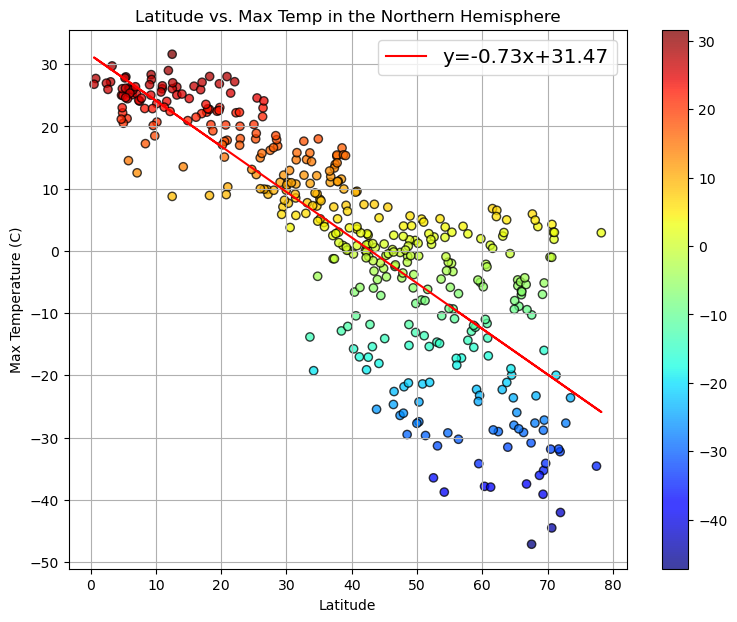

In [79]:
# Linear regression on Northern Hemisphere
sc = plot_linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere", "jet")

# Cosmetic Adjustments
plt.ylabel("Max Temperature (C)")

# Save figure
plt.savefig("output_data/Fig5.png")

The r-value is 0.4149270707242341.


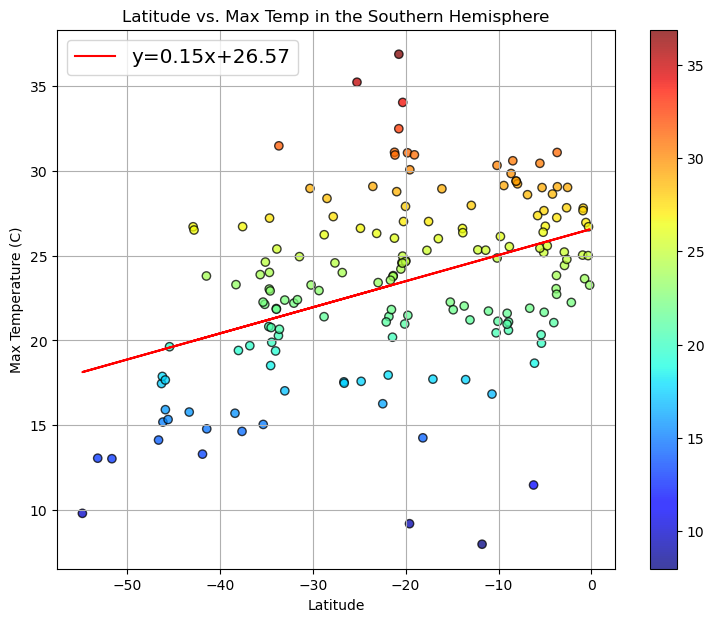

In [81]:
# Linear regression on Southern Hemisphere
plot_linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere", "jet")

# Cosmetic Adjustments
plt.ylabel("Max Temperature (C)")

# Save figure
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** In both northern and southern hemispheres, the max temperature of a city seems to be highly correlated to its latitude. While the cities in the northern hemisphere appear to be more highly correlated based on the r-value, this is likely due to the random sampling taking in more values than the sourthern hemisphere. 

Temperature and latitude are positively correlated in the southern hemisphere, and negatively correlated in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3724561227682874.


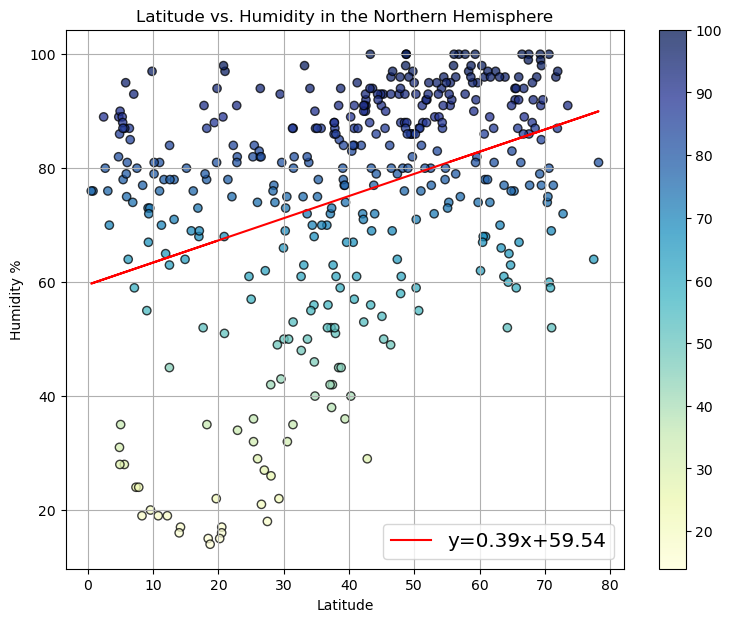

In [83]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere", "YlGnBu")

# Cosmetic Adjustments
plt.ylabel("Humidity %")

# Save figure
plt.savefig("output_data/Fig7.png")

The r-value is 0.4191157687354112.


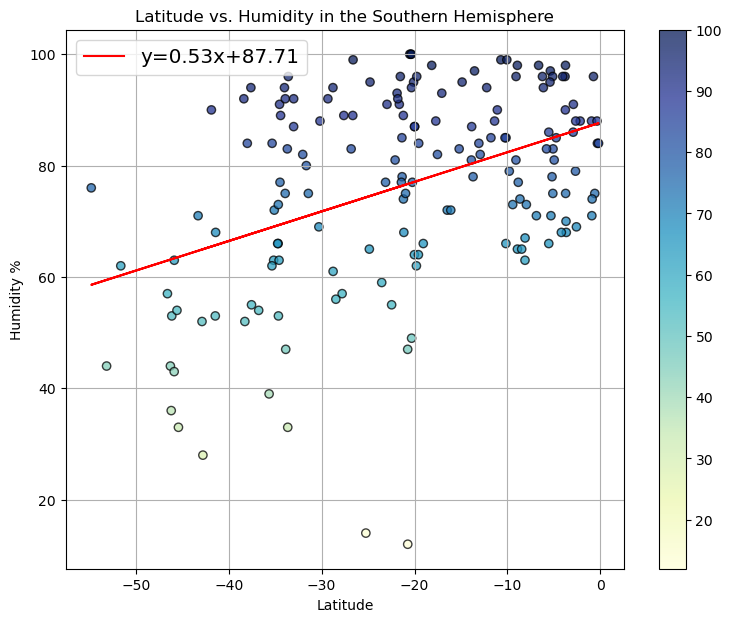

In [84]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere", "YlGnBu")

# Cosmetic Adjustments
plt.ylabel("Humidity %")

# Save figure
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** Compared to the correlation between temperature and latitude, the correlation between humidity and latitude appears weak as both r-values are under .5. It is notable that both r-values for southern and northern hemispheres are positively correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.26358223736624303.


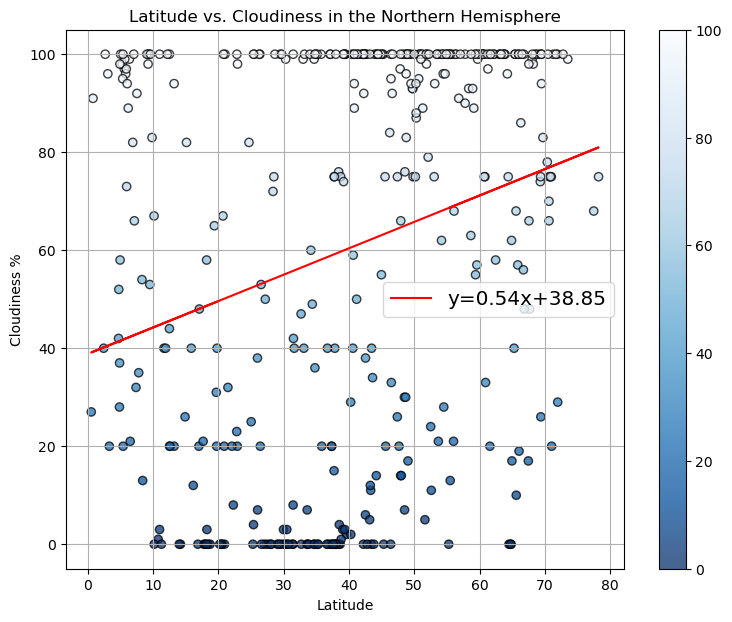

In [85]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere", plt.get_cmap("Blues").reversed())

# Cosmetic Adjustments
plt.ylabel("Cloudiness %")

# Save figure
plt.savefig("output_data/Fig9.png")

The r-value is 0.5391438803948783.


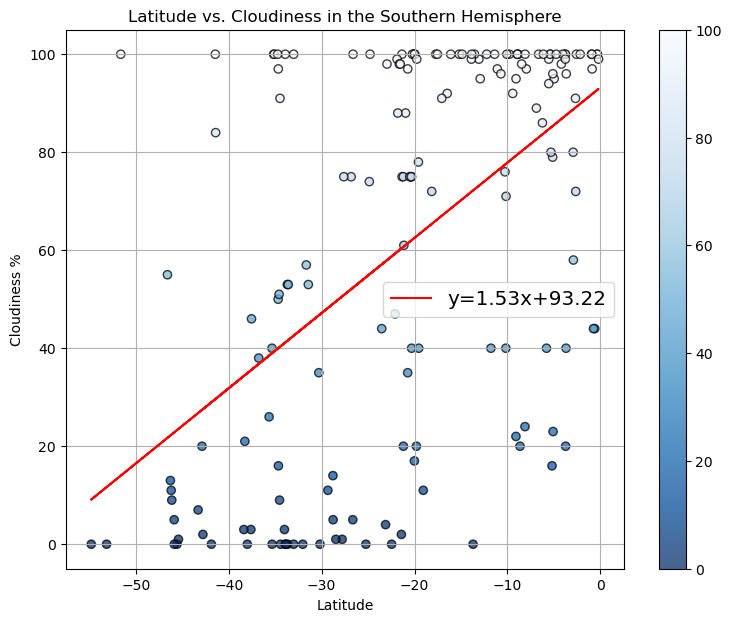

In [86]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere", plt.get_cmap("Blues").reversed())

# Cosmetic Adjustments
plt.ylabel("Cloudiness %")

# Save figure
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** There appears to be a stronger positive correlation in the southern hemisphere cities compared to lower hemisphere cities for cloudiness. In both cases, the correlation is week, as the r-values are around or under .5. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.18827217145591693.


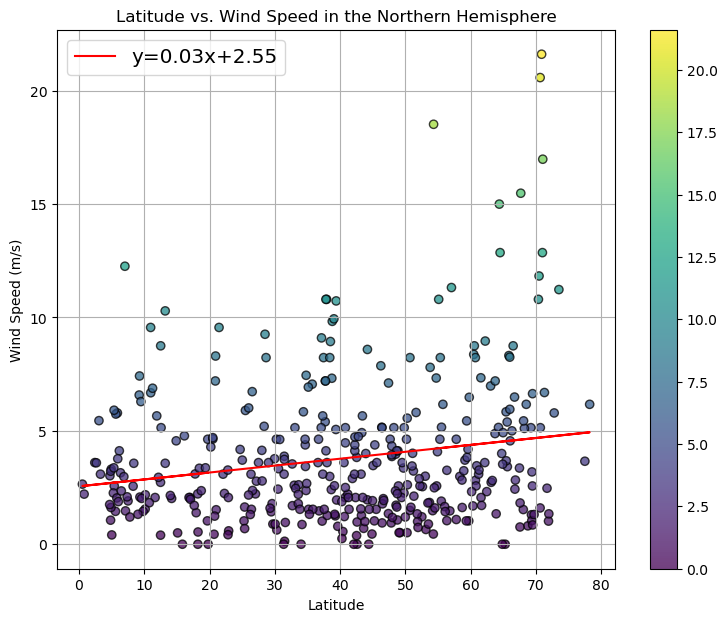

In [87]:
# Northern Hemisphere
plot_linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere", "viridis")

# Cosmetic Adjustments
plt.ylabel("Wind Speed (m/s)")

# Save figure
plt.savefig("output_data/Fig11.png")

The r-value is -0.2357251459546261.


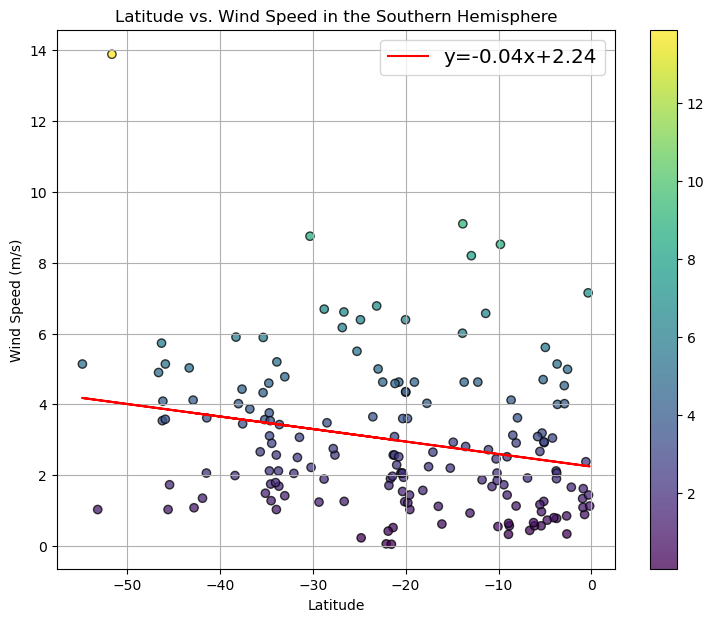

In [88]:
# Southern Hemisphere
plot_linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere", "viridis")

# Cosmetic Adjustments
plt.ylabel("Wind Speed (m/s)")

# Save figure
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** It is notable that in the northern hemisphere, the correlation between wind speed and latitude is negative whereas in the southern hemisphere, the correlation is positive. In both case, the correlation (aka r-values) are weak. 